In [3]:
import pandas as pd
pd.options.display.max_columns = 100

In [4]:
all_mut_df = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
display(len(all_mut_df), all_mut_df.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantl

In [5]:
FEAT_TYPES = [
    "genomic features",
    "operons",
    "pathways",
    "regulators",
]  # ignoring genetic features for now since the genes get double with genomic features

In [6]:
targ_mut_df = pd.DataFrame()
for _, m in all_mut_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            if "glycerol(2.5)" in f["significantly associated conditions"]:
                mut_assoc = True
                break
        if mut_assoc:
            break

    if mut_assoc:
        targ_mut_df = targ_mut_df.append(m)

display(len(targ_mut_df), targ_mut_df.head())

149

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
185,{'General function prediction only': ['ECK1200...,[{'name': 'General function prediction only'}],T247M (ACG→ATG),{},[],SNP,231861.0,{},NC_000913,C→T,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 1,280.0,{ECK120001594},1.0,{'ECK120001594': ['ECK120001594']},"[{'name': 'yafD', 'RegulonDB ID': 'ECK12000159...","[{'name': 'yafD', 'RegulonDB ID': 'ECK12000159...",{},[],14710,0.0,yafD,NH4Cl(1),{'ECK120029169': ['ECK120001594']},"[{'name': 'yafDE', 'RegulonDB ID': 'ECK1200291...",0.0,{},[],KH2PO4(3) Na2HPO4(6.8),0.72,{},[],{},0.0,"(231861, 231861)",{},[],1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
186,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 1,280.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
187,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],S59Y (TCC→TAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117047.0,{},NC_000913,G→T,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 1,280.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",{'GlpR': ['glpFKX']},"[{'name': 'GlpR', 'significantly associated co...",14712,0.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'signific...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Glycerol kinase (EC 2.7.1.30)': ['ECK1200147...,"[{'name': 'Glycerol kinase (EC 2.7.1.30)', 'si...",{},0.0,"(4117047, 4117047)","{'GlpR': ['ECK120014723'], 'CRP': ['ECK1200147...","[{'name': 'GlpR', 'significantly associated co...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
188,{'Amino acid transport and metabolism': ['ECK1...,[{'name': 'Amino acid transport and metabolism'}],T593P (ACC→CCC),"{'1.1.1.3': ['ECK120015057', 'ECK120015057', '...","[{'name': '1.1.1.3', 'significantly associated...",SNP,4131611.0,{},NC_000913,A→C,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 1,280.0,{ECK120000583},1.0,{'ECK120000583': ['ECK120000583']},"[{'name': 'metL', 'RegulonDB ID': 'ECK12000058...","[{'name': 'metL', 'RegulonDB ID': 'ECK12000058...",{'MetJ': ['metBL']},"[{'name': 'MetJ', 'significantly associated co...",14711,0.0,metL,NH4Cl(1),{'ECK120015057': ['ECK120000583']},"[{'name': 'metBL', 'RegulonDB ID': 'ECK1200150..

In [7]:
# Generating counts for gdmut paper's supplemental material

def _get_feat_name(feat_id, mut_feats):
    name = ''
    for d in mut_feats:
        if d["RegulonDB ID"] == feat_id:
            name = d["name"]
    return name
    

geno_feat_tot_mut_cnts = pd.DataFrame()
op_tot_mut_cnts = pd.DataFrame()
reg_tot_mut_cnts = pd.DataFrame()
# Using the individual feature columns rather than link columns because this guarantees considering all linked and non-linked features
# for each of these levels, except genomic features.
for _, m in targ_mut_df.iterrows():
    
    for geno_feat in m["genomic features"]:
        geno_feat_id = geno_feat["RegulonDB ID"]
        if geno_feat_id not in geno_feat_tot_mut_cnts.index:
            srs = pd.Series({"genomic feature name": geno_feat["name"], "mutations": 0}, name=geno_feat_id)  # Using RegulonDB ID for genomic features since their names are not unique.
            geno_feat_tot_mut_cnts = geno_feat_tot_mut_cnts.append(srs)
        geno_feat_tot_mut_cnts.at[geno_feat_id, "mutations"] += 1

    for op_id, links in m["operon links"].items():
        op_name = _get_feat_name(op_id, m["operons"])
        if op_name not in op_tot_mut_cnts.index:
            srs = pd.Series({"mutations": 0}, name=op_name)
            op_tot_mut_cnts = op_tot_mut_cnts.append(srs)
        op_tot_mut_cnts.at[op_name, "mutations"] += len(links)
        
    for reg_name, links in m["regulator links"].items():
        if reg_name not in reg_tot_mut_cnts.index:
            srs = pd.Series({"mutations": 0}, name=reg_name)
            reg_tot_mut_cnts = reg_tot_mut_cnts.append(srs)
        reg_tot_mut_cnts.at[reg_name, "mutations"] += len(links)


# cleaning up after the above populating
geno_feat_tot_mut_cnts.index.name = "RegulonDB ID" # Using RegulonDB ID for genomic features since their names are not unique.
geno_feat_tot_mut_cnts["mutations"] = geno_feat_tot_mut_cnts["mutations"].astype(int)
geno_feat_tot_mut_cnts = geno_feat_tot_mut_cnts.sort_values(by=["mutations"], ascending=False)

op_tot_mut_cnts.index.name = "operon name"
op_tot_mut_cnts["mutations"] = op_tot_mut_cnts["mutations"].astype(int)
op_tot_mut_cnts = op_tot_mut_cnts.sort_values(by="mutations", ascending=False)

reg_tot_mut_cnts.index.name = "regulon name"
reg_tot_mut_cnts["mutations"] = reg_tot_mut_cnts["mutations"].astype(int)
reg_tot_mut_cnts = reg_tot_mut_cnts.sort_values(by="mutations", ascending=False)


writer = pd.ExcelWriter('../Supplementary_Tables_1_2_3.xlsx', engine='xlsxwriter')
frames = {"Supplementary Table 1": geno_feat_tot_mut_cnts, "Supplementary Table 2": op_tot_mut_cnts, "Supplementary Table 3": reg_tot_mut_cnts}

for sheet, frame in  frames.items():
    frame.to_excel(writer, sheet_name = sheet)

writer.save()

In [8]:
assoc_uniq_feat_type_d = dict()
for _, m in targ_mut_df.iterrows():
    for ft in FEAT_TYPES:
        for f in m[ft]:
            if "glycerol(2.5)" in f["significantly associated conditions"]:
                
                output_feat_type = ft
                if ft == "genomic features":
                    output_feat_type = f["feature type"]
                    if output_feat_type == "unknown":
                        output_feat_type = "intergenic"
                
                if output_feat_type not in assoc_uniq_feat_type_d.keys():
                    assoc_uniq_feat_type_d[output_feat_type] = set()
                assoc_uniq_feat_type_d[output_feat_type].add(f["name"])
# assoc_uniq_feat_type_d

In [9]:
assoc_uniq_feat_type_cnt_d = dict()
assoc_uniq_feat_type_cnt_d["mutations"] = [len(targ_mut_df)]  # putting values in list for making df later
for ft in assoc_uniq_feat_type_d.keys():
    assoc_uniq_feat_type_cnt_d[ft] = [len(assoc_uniq_feat_type_d[ft])]
assoc_uniq_feat_type_cnt_d

{'mutations': [149],
 'gene': [38],
 'operons': [46],
 'pathways': [8],
 'regulators': [12],
 'promoter': [6],
 'intergenic': [14],
 'terminator': [4],
 'TFBS': [1],
 'attenuator terminator': [4]}

In [10]:
assoc_uniq_feat_type_cnt_d["regulons"] = assoc_uniq_feat_type_cnt_d.pop("regulators")

Text(0.5, 0, '')

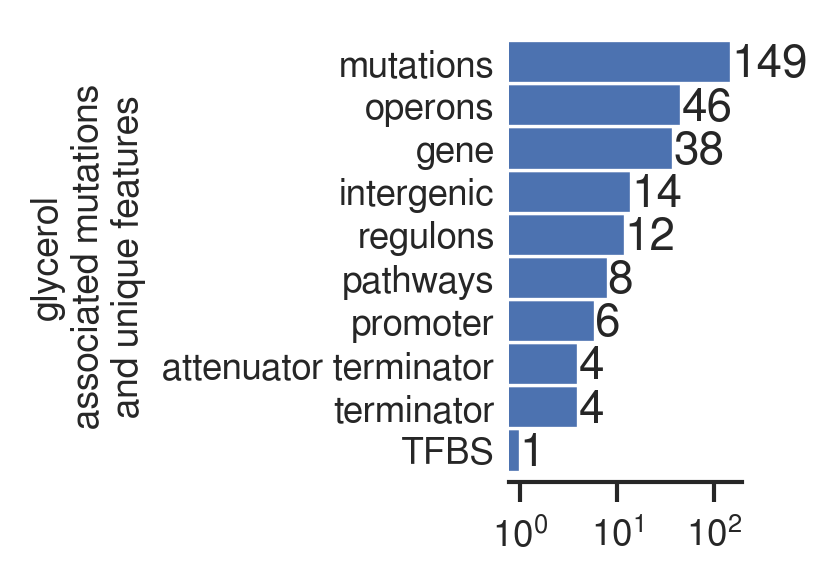

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_palette("deep")
sns.set_style("ticks")

df = pd.DataFrame.from_dict(assoc_uniq_feat_type_cnt_d).T
df = df.sort_values(by=0, ascending=True)
ax = df.plot.barh(
    figsize=(1,2),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='both', length=0)

ax.xaxis.get_major_locator().numticks = 4  # Don't know why this work

# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")
    
df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str(int(r[0]))
    ax.text(r[0], i-0.35, s, fontname="FreeSans", fontsize=11)

# ax.set_title("Mutations\nand unique features\nassociated to\nglycerol", fontname="FreeSans")
ax.set_ylabel("glycerol\nassociated mutations\nand unique features", fontname="FreeSans", fontsize=9)
# ax.set_xticklabels([])
ax.set_xlabel('', fontname="FreeSans", fontsize=9)
# ax.xaxis.labelpad = -2